## AST Project 2
### Collaborators: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
### Michigan State University
### AST 304

In [1]:
########################################################################
# Team Spectacular Stellars: Arian Andalib, Ashley Stone, Jonathan Kho, Emma Oswald
# AST 304, Fall 2022
# Michigan State University
########################################################################
    
# The libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline
from eos import *
from astro_const import *
from observations import *
from structure import *
from test_eos import *
from scipy.optimize import bisect
import pandas as pd

In [3]:
# 2.2
!python test_eos.py

Comparing EOS to eos_table.txt...

   rho (table)    rho (test)    difference       P (table)      P (test)    difference

  1.000000e+05  1.000000e+05  5.820766e-16    6.810445e+14  6.810445e+14  0.000000e+00
  1.123655e+05  1.123655e+05  1.295052e-16    8.271108e+14  8.271108e+14  7.556424e-16
  1.262600e+05  1.262600e+05  9.220284e-16    1.004504e+15  1.004504e+15 -7.466368e-16
  1.418727e+05  1.418727e+05  4.102810e-16    1.219944e+15  1.219944e+15  2.049274e-16
  1.594159e+05  1.594159e+05  1.825654e-16    1.481591e+15  1.481591e+15  6.749502e-16
  1.791284e+05  1.791284e+05  6.498986e-16    1.799353e+15  1.799353e+15 -1.389388e-16
  2.012785e+05  2.012785e+05  7.229740e-16    2.185268e+15  2.185268e+15 -3.432074e-16
  2.261676e+05  2.261676e+05  5.147303e-16    2.653950e+15  2.653950e+15  1.883984e-16
  2.541343e+05  2.541343e+05  5.726073e-16    3.223153e+15  3.223153e+15  0.000000e+00
  2.855592e+05  2.855592e+05  8.153497e-16    3.914436e+15  3.914436e+15 -3.831970e-16
  3.208

In [4]:
def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

In [5]:
# 2.6 Testing integration
# Here, we tested delta_m, eta, and xi to ensure that our values for m, r, and p didn't
# change when these parameters were slightly adjusted

M = Msun
mue = 2

Pguess = pressure_guess(M,mue)

delta_m = 1e-4
eta = 1e-6
xi = 0.01

m,r,p = integrate(Pguess,delta_m,eta,xi,mue)

In [6]:
# masses = Msun*np.arange(0.1,1.1,0.1)
# Pcs = np.zeros(10)
# Pguesses = np.zeros(10)

# for i in range(len(masses)):
#     Pguess = pressure_guess(masses[i],mue)
#     Pguesses[i] = Pguess
#     Pc = bisect(f,Pguess/100,Pguess,args = (masses[i],delta_m,eta,xi,mue))
#     Pcs[i] = Pc

In [7]:
# For 2.6 calibration: off by this factor
# Pguesses/Pcs 

The above code was used to find the factor by which our Pguess was off from the true value of the central pressure. This gave us the array array([40.09269443, 40.09270145, 40.0926923 , 40.09269571, 40.09270147, 40.09269932, 40.09269657, 40.09270274, 40.09270293, 40.09269572]), so we introduced a factor of 40.09269 to our pressure_guess function.

In [8]:
masses = Msun*np.arange(0.1,1.1,0.1)
Pcs = np.zeros(10)
Pguesses = np.zeros(10)

for i in range(len(masses)):
    Pguess = pressure_guess(masses[i],mue)
    Pguesses[i] = Pguess
    Pc = bisect(f,Pguess/10,Pguess*10,args = (masses[i],delta_m,eta,xi,mue))
    Pcs[i] = Pc

In [9]:
Pguesses/Pcs 

array([1.00000011, 1.00000029, 1.00000006, 1.00000014, 1.00000029,
       1.00000023, 1.00000016, 1.00000032, 1.00000032, 1.00000014])

In [10]:
central_dens = density(Pcs,2)
central_dens

array([4.06315457e+07, 1.62526166e+08, 3.65683923e+08, 6.50104719e+08,
       1.01578854e+09, 1.46273554e+09, 1.99094568e+09, 2.60041860e+09,
       3.29115478e+09, 4.06315449e+09])

In [11]:
Radii = np.zeros(10)

for i in range(len(masses)):
    m,r,p = integrate(Pcs[i],delta_m,eta,xi,mue)
    Radii[i] = r[-1]

In [12]:
R = Radii/Rsun
Pcsnorm = Pcs/(G*(masses**2)*Radii**(-4))
central_dens_norm = central_dens/((3*masses)/(4*np.pi*Radii**(3)))

In [67]:
array = np.array([masses/Msun,R,Pcs,Pcsnorm,central_dens,central_dens_norm])
MRdf = pd.DataFrame(array,index = ["$\dfrac{M}{M_{\odot}}$","$\dfrac{R}{R_\odot}$",
                                   "$P_c$","$\dfrac{P_c}{GM^2R^{-4}}$","$\rho_c$",
                                   "$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$"]).transpose()
MRdf.columns = ["$$\dfrac{M}{M_{\odot}}$$","$$\dfrac{R}{R_\odot}$$",
                                   "$$P_c$$","$$\dfrac{P_c}{GM^2R^{-4}}$$","$$\rho_c$$",
                                   "$$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$$"]
MRdf

,$$\dfrac{M}{M_{\odot}}$$,$$\dfrac{R}{R_\odot}$$,$$P_c$$,$$\dfrac{P_c}{GM^2R^{-4}}$$,$$\rho_c$$,$$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$$
0,0.1,0.027348,1.518033e+19,0.753813,4.063155e+07,5.895168
1,0.2,0.021707,1.530081e+20,0.753849,1.625262e+08,5.895376
2,0.3,0.018962,5.911331e+20,0.753802,3.656839e+08,5.895104
3,0.4,0.017228,1.542225e+21,0.753820,6.501047e+08,5.895205
4,0.5,0.015993,3.244748e+21,0.753849,1.015789e+09,5.895376
5,0.6,0.015050,5.958247e+21,0.753838,1.462736e+09,5.895312
6,0.7,0.014297,9.960348e+21,0.753824,1.990946e+09,5.895231
7,0.8,0.013674,1.554465e+22,0.753855,2.600419e+09,5.895414
8,0.9,0.013148,2.301915e+22,0.753856,3.291155e+09,5.895420
9,1.0,0.012694,3.270502e+22,0.753820,4.063154e+09,5.895206


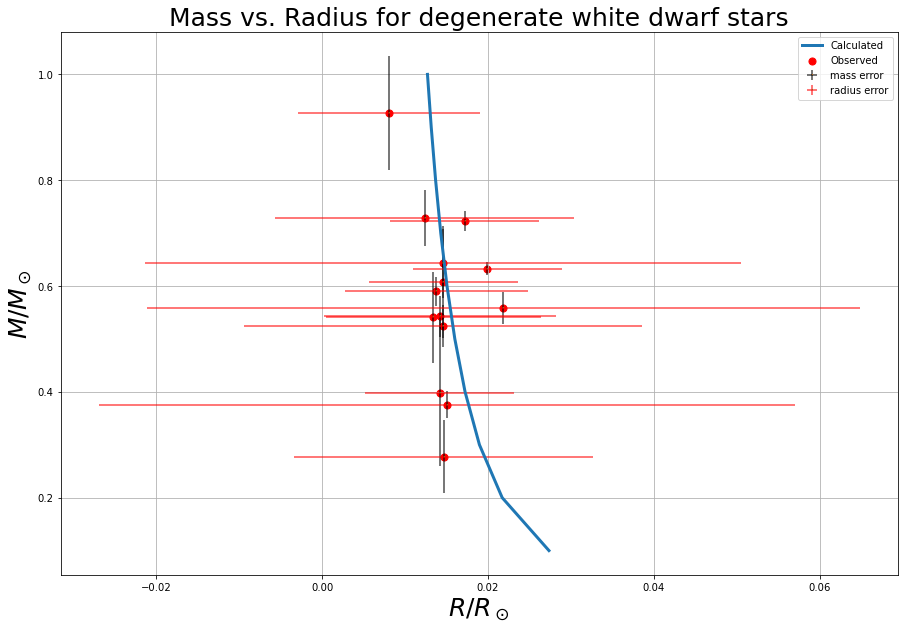

In [66]:
obs = MassRadiusObservations()
plt.figure(figsize = (15,10))
plt.plot(MRdf[ '$$\dfrac{R}{R_\odot}$$'],MRdf['$$\dfrac{M}{M_{\odot}}$$'],label = "Calculated",lw = 3)
plt.scatter(obs.radii/100,obs.masses,label = "Observed",color = "Red",s = 50)
plt.grid()
plt.ylabel("$M/M_\odot$",size = 25)
plt.xlabel("$R/R_\odot$",size = 25)
plt.title("Mass vs. Radius for degenerate white dwarf stars",size = 25)
plt.errorbar(obs.radii/100,obs.masses,obs.mass_errors,0,fmt=",",ecolor="black",alpha=0.7,label="mass error")
plt.errorbar(obs.radii/100,obs.masses,0,obs.radius_errors,fmt=",",ecolor="red",alpha=0.7,label="radius error")
plt.legend()
plt.show()